In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from lightjob.cli import load_db
from lightjob.db import SUCCESS
import numpy as np
import pandas as pd

In [3]:
db = load_db()

In [4]:
jobs = list(db.jobs_with(state=SUCCESS, where='jobset3'))

In [5]:
train_stat = 'train_acc'
valid_stat = 'valid_acc'
test_stat = 'test_acc'
agg = max
argagg = np.argmax

learning_rate = [j['content']['hp']['learning_rate'] for j in jobs]
max_train_acc = [agg(h[train_stat] for h in j['history']) for j in jobs]
max_valid_acc = [agg(h[valid_stat] for h in j['history']) for j in jobs]
max_test_acc = [agg(h[test_stat] for h in j['history']) for j in jobs]
test_max_valid_acc = [ j['history'][argagg(h[valid_stat] for h in j['history'])][test_stat] for j in jobs]

In [11]:
df = pd.DataFrame(
    {
        'learning_rate': learning_rate,
        'max_train_acc': max_train_acc,
        'max_valid_acc': max_valid_acc,
        'max_test_acc': max_test_acc,
        'test_max_valid_acc': test_max_valid_acc
    }
)
df['log_learning_rate'] = np.log(df['learning_rate'])

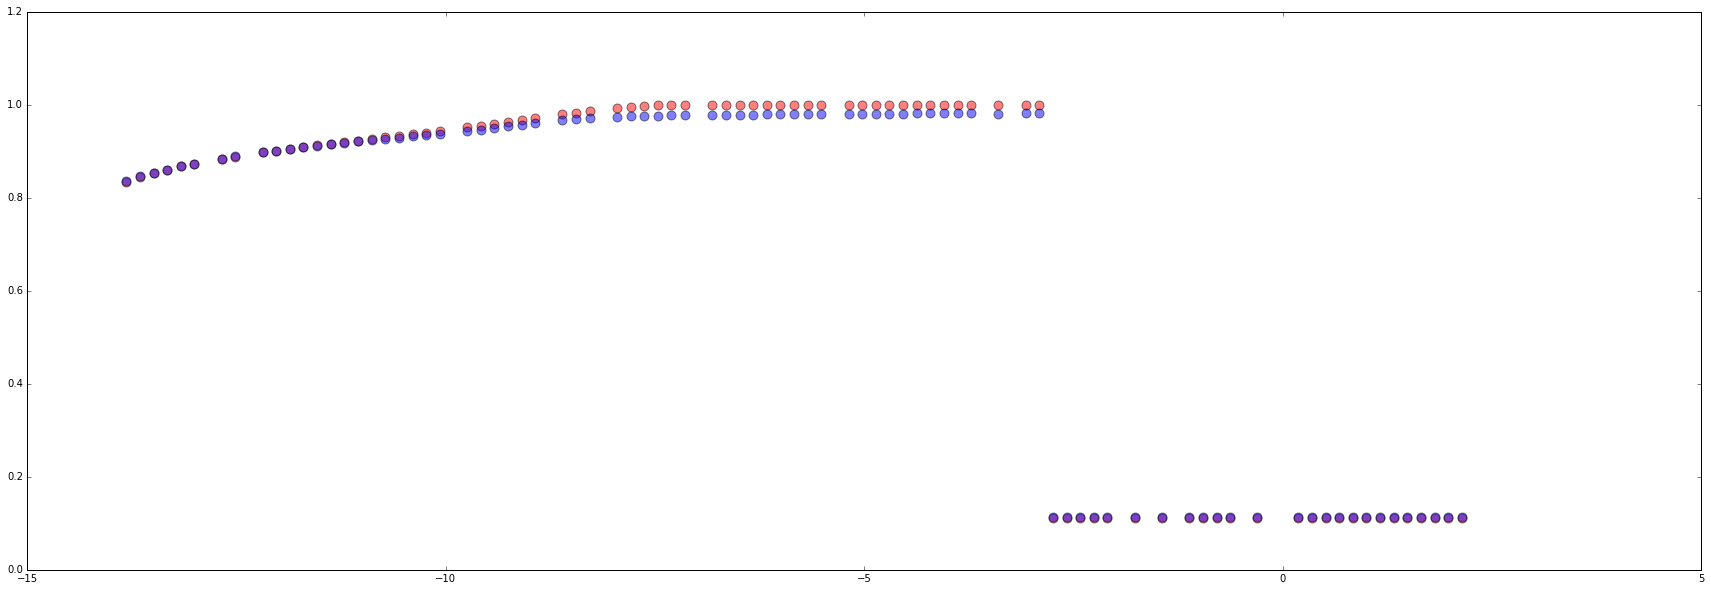

In [18]:
fig = plt.figure(figsize=(30, 10))
plt.scatter(df['log_learning_rate'], df['max_train_acc'], c='r', s=80, alpha=0.5)
plt.scatter(df['log_learning_rate'], df['max_valid_acc'], c='b', s=80, alpha=0.5)

In [19]:
d = [[h[train_stat], h[valid_stat], j['content']['hp']['learning_rate']] for j in jobs for h in j['history']]
d = np.array(d)
d = {
    'train': [hist[train_stat] for j in jobs for hist in j['history']],
    'valid': [hist[valid_stat] for j in jobs for hist in j['history']],
    'learning_rate': [j['content']['hp']['learning_rate'] for j in jobs for hist in j['history']]
}
df = pd.DataFrame(d)
df['log_learning_rate'] = np.log(df['learning_rate'])

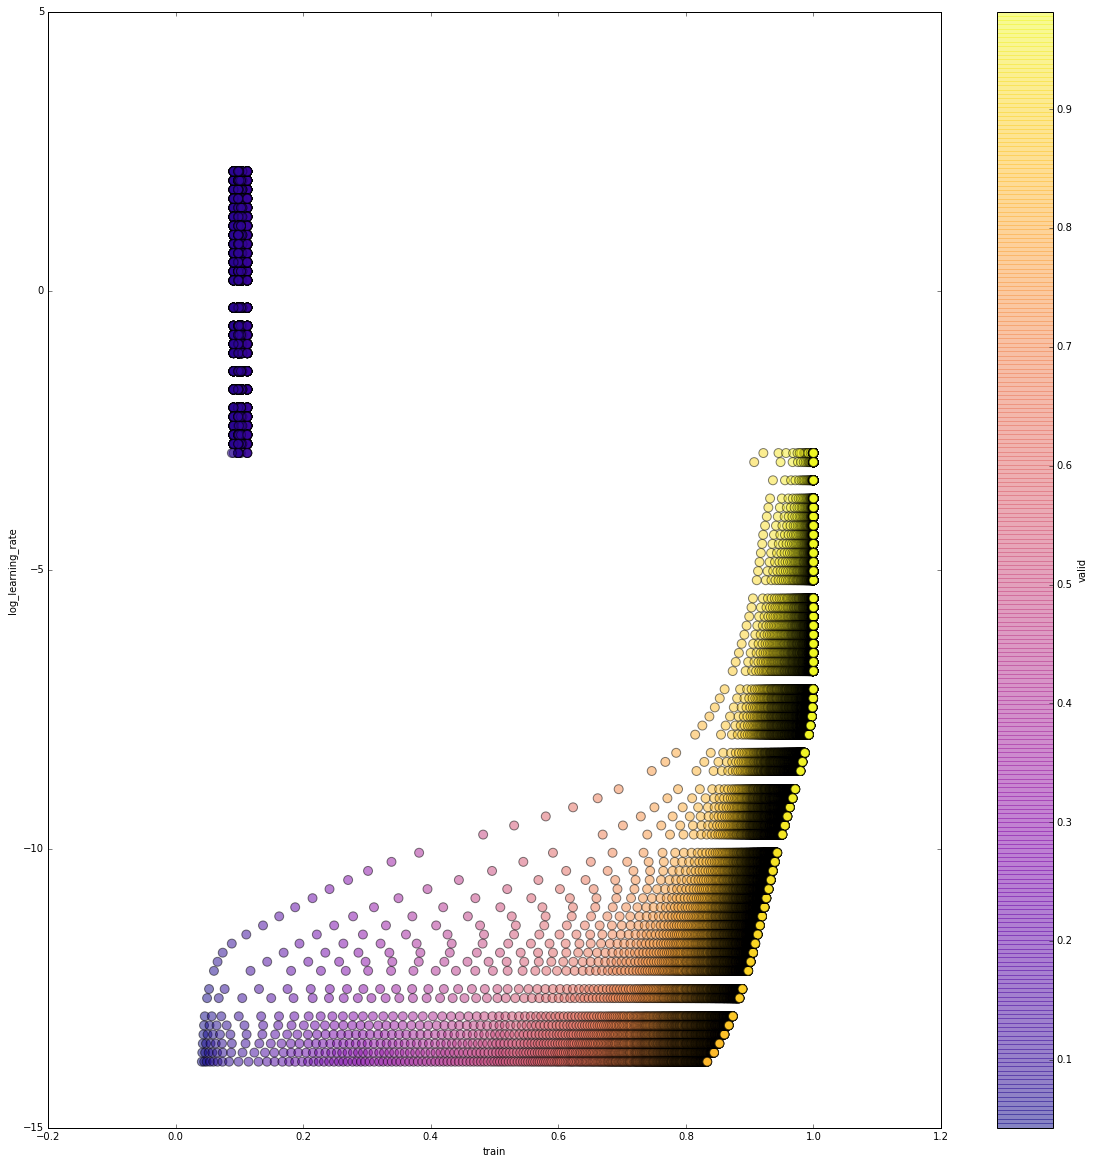

In [25]:
fig = plt.figure(figsize=(20, 20))
p = plt.scatter(df['train'], df['log_learning_rate'], c=df['valid'], s=80, alpha=0.5, cmap='plasma')
plt.xlabel('train')
plt.ylabel('log_learning_rate')
plt.colorbar(p, label='valid')

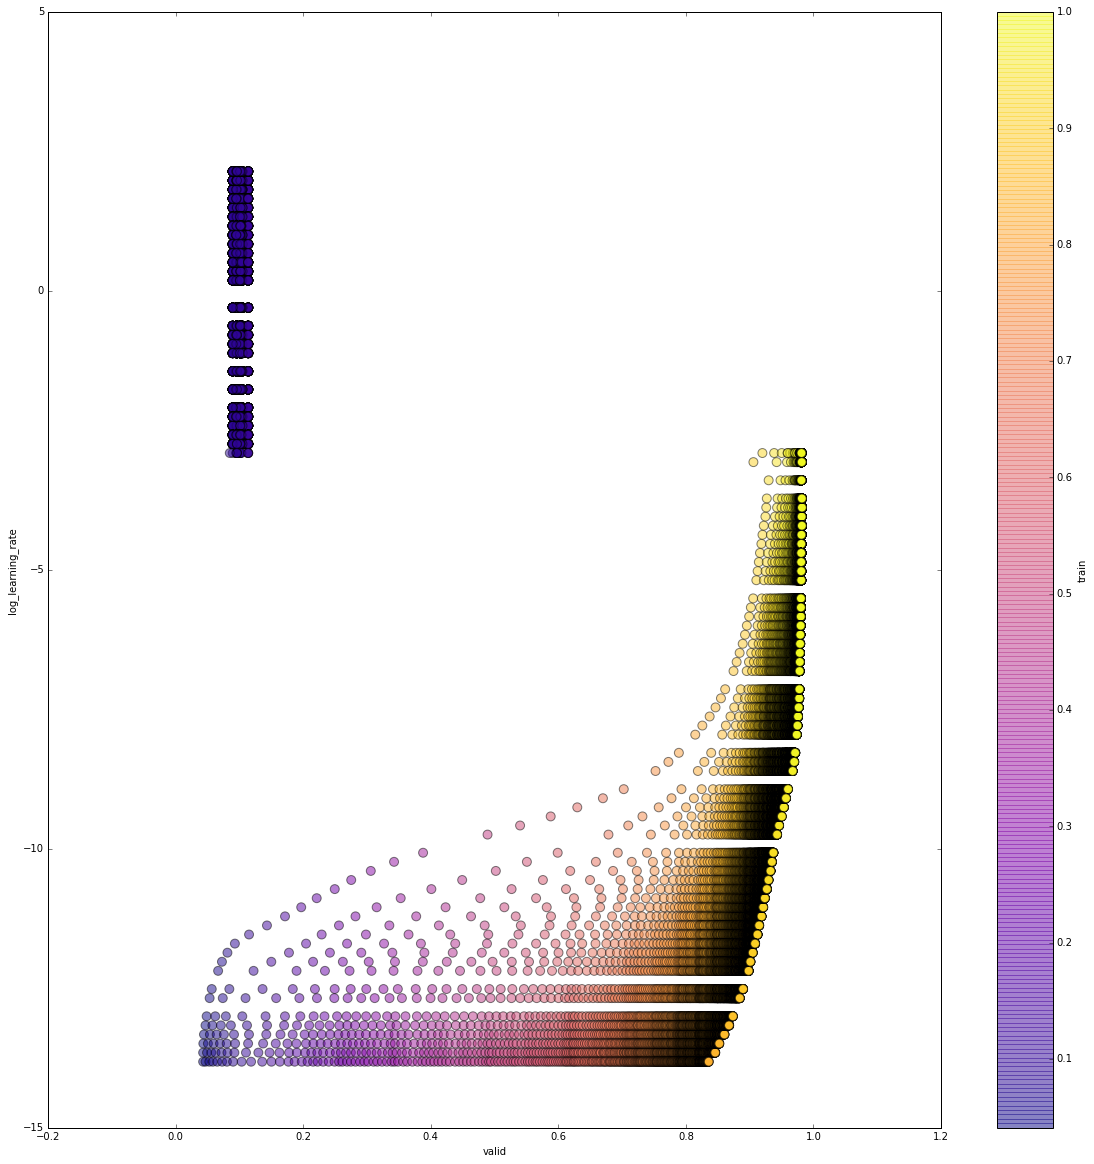

In [31]:
fig = plt.figure(figsize=(20, 20))
p = plt.scatter(df['valid'], df['log_learning_rate'], c=df['train'], s=80, alpha=0.5, cmap='plasma')
plt.xlabel('valid')
plt.ylabel('log_learning_rate')
plt.colorbar(p, label='train')

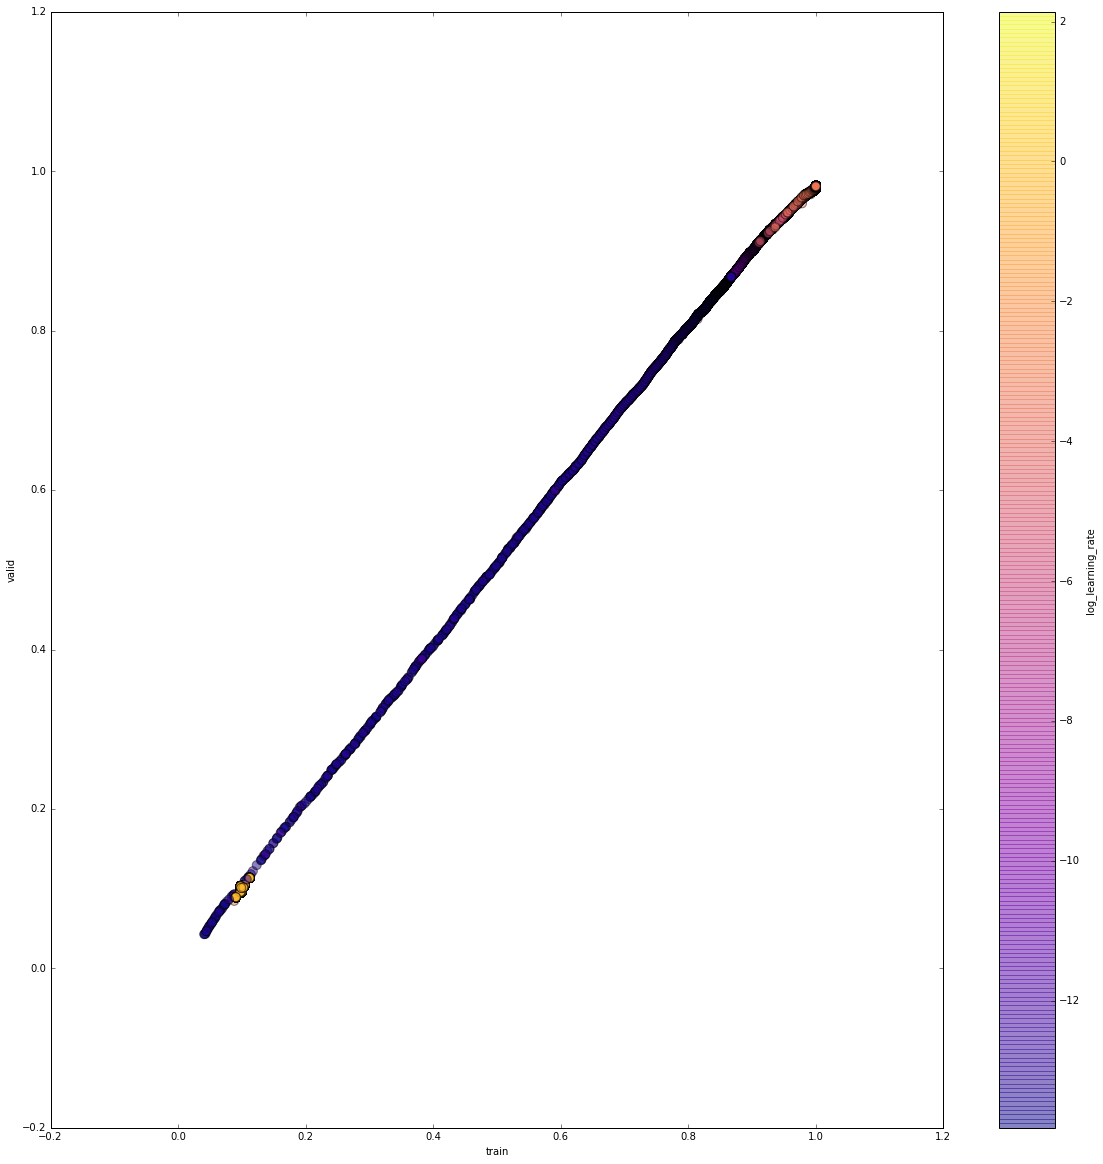

In [33]:
fig = plt.figure(figsize=(20, 20))
p = plt.scatter(df['train'], df['valid'], c=df['log_learning_rate'], s=80, alpha=0.5, cmap='plasma')
plt.xlabel('train')
plt.ylabel('valid')
plt.colorbar(p, label='log_learning_rate')

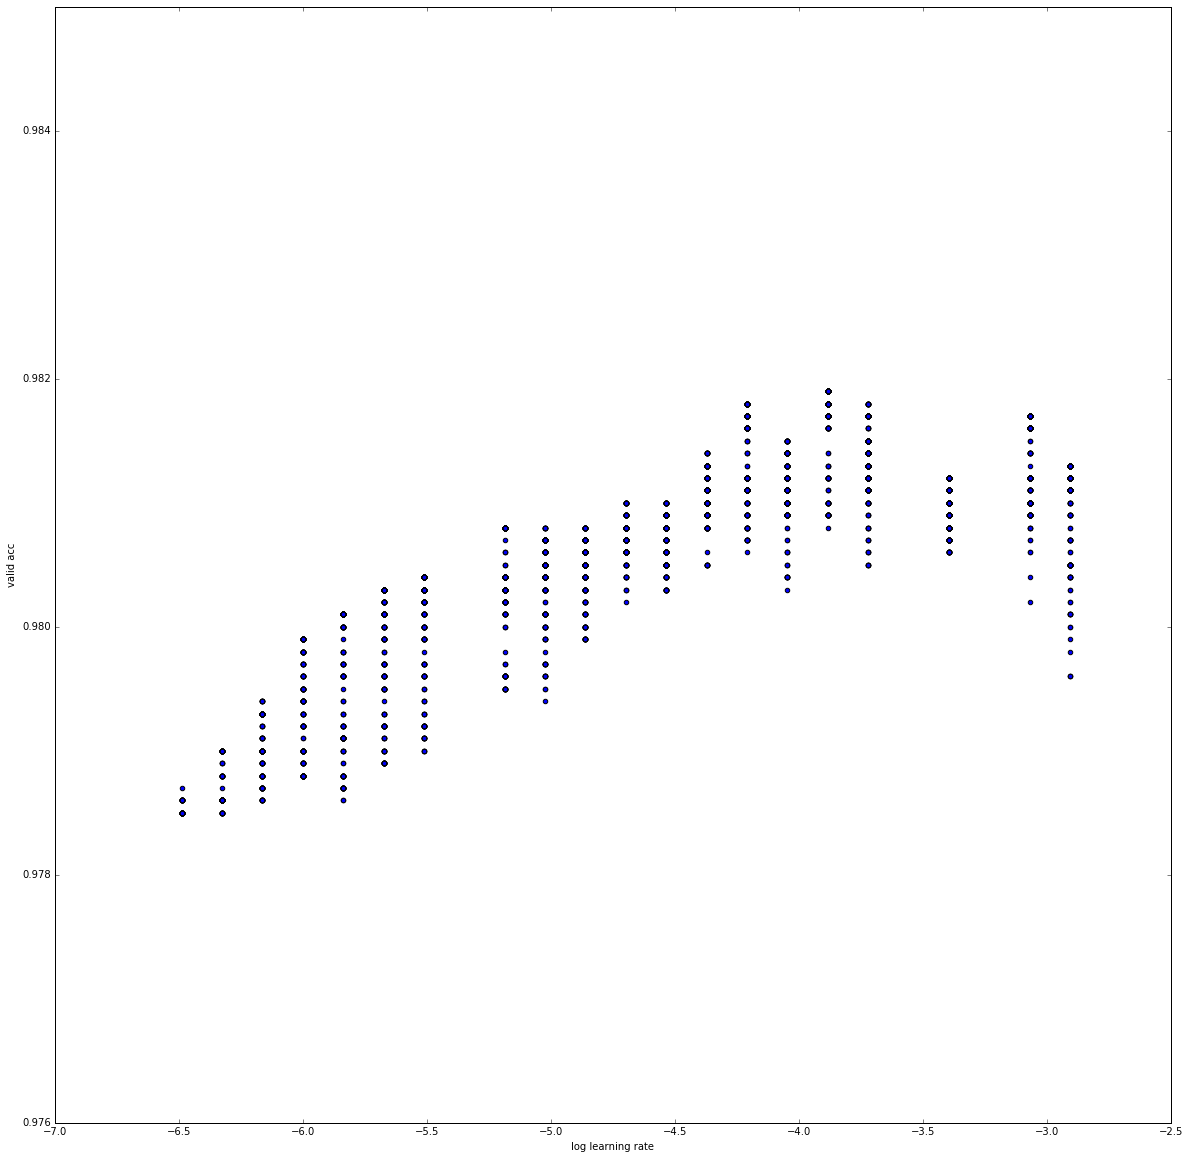

In [29]:
fig = plt.figure(figsize=(20, 20))
o = df['train']==1
plt.scatter(df['log_learning_rate'][o], df['valid'][o])
plt.xlabel('log learning rate')
plt.ylabel('valid acc')

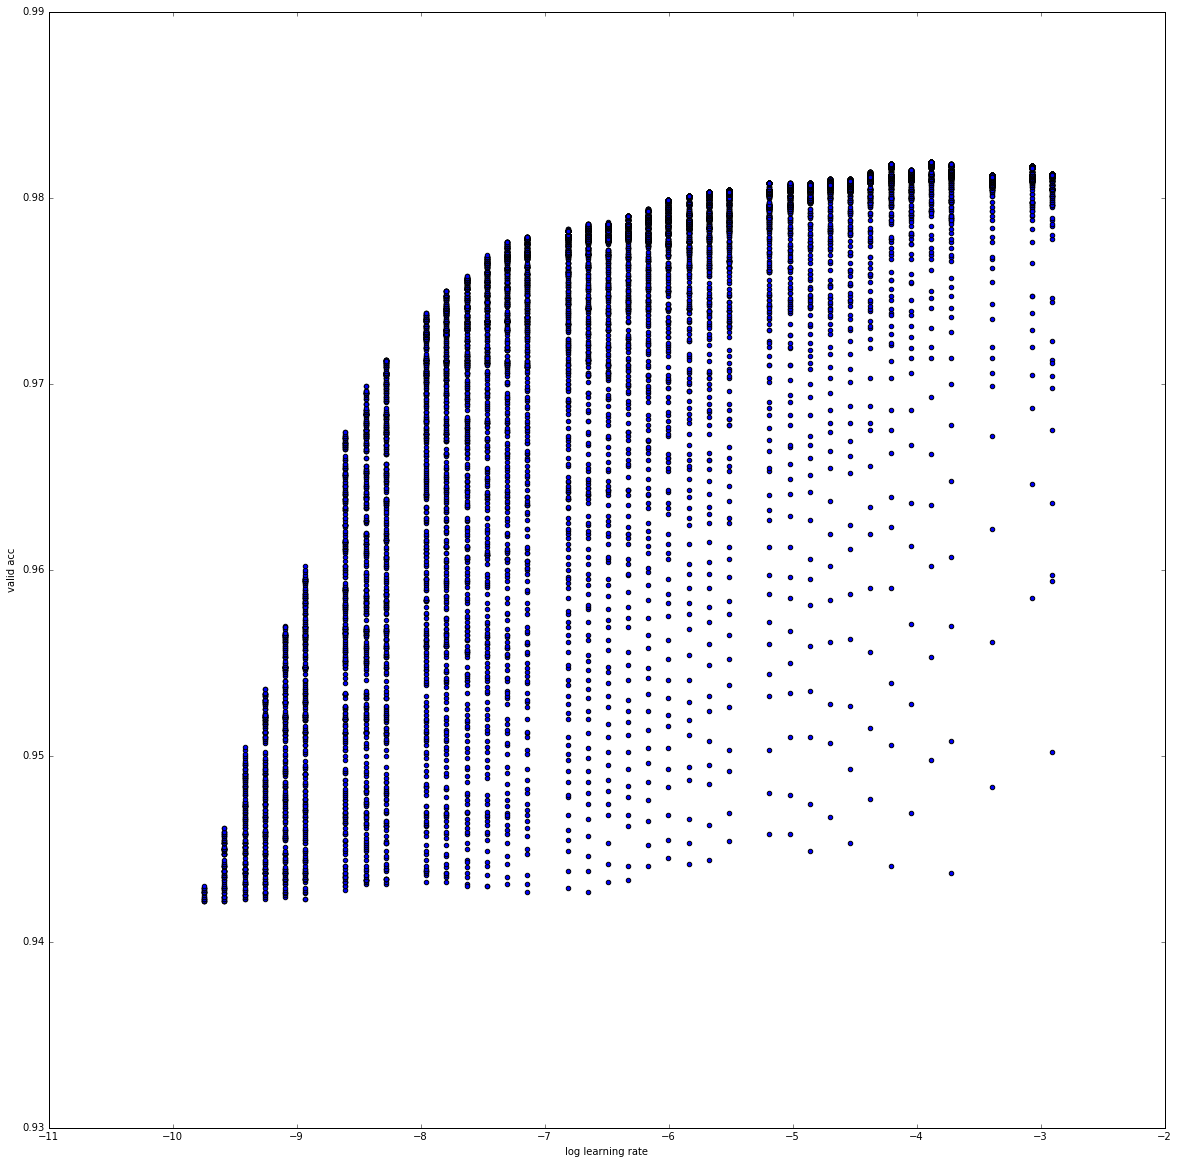

In [36]:
fig = plt.figure(figsize=(20, 20))
o = df['train']>0.95
plt.scatter(df['log_learning_rate'][o], df['valid'][o])
plt.xlabel('log learning rate')
plt.ylabel('valid acc')

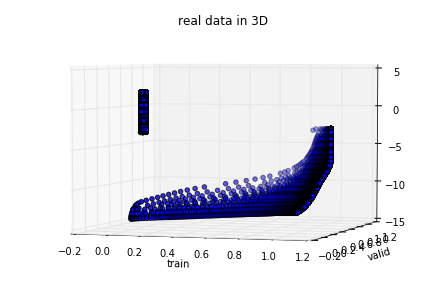

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['train'], df['valid'], df['log_learning_rate'], s=20)
plt.xlabel('train')
plt.ylabel('valid')
#plt.zlabel('log_learning_rate')
ax.view_init(4, -72)
plt.title('real data in 3D')
plt.show()